In [1]:
import pandas as pd
import numpy as np

#viz and stats
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import pearsonr, spearmanr

#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error

#import r2_score from sklearn
from sklearn.metrics import r2_score

import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
#my wrangle file 
import wrangle
#split data
from sklearn.model_selection import train_test_split
import evaluate

import env

### Exercises
### Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### 1. Load your zillow dataset.



In [2]:
#acquire data
df = wrangle.wrangle_zillow()
df

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037
...,...,...,...,...,...,...,...
2152815,4,2.0,1484,71859,1955,1135.72,6037
2152824,2,1.0,710,175319,1940,2040.78,6111
2152831,3,2.0,1194,271536,1954,3555.73,6037
2152852,3,2.0,1917,408680,1946,4341.32,6111


In [3]:
#get shape
df.shape

(1827497, 7)

In [4]:
# split
#split data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)
train.shape, validate.shape, test.shape

((1096497, 7), (365500, 7), (365500, 7))

In [5]:
train.head(5)

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
511824,3,2.0,1845,497915,1952,5967.44,6037
986893,3,2.0,1524,320818,1955,4068.13,6037
1462975,2,2.0,1651,608536,1984,6639.32,6059
1152928,3,1.0,1112,372790,1953,4586.50,6037
816888,3,2.0,1424,340818,1975,4071.32,6059


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.



In [6]:
#calculate mean
baseline = df.tax_value.mean()
baseline

334280.3382785307

In [7]:
#add it to the df to get yhat & predictions
df['yhat_baseline'] = baseline


In [8]:
df

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat_baseline
7,3,2.0,2077,646760,1926,7924.68,6037,334280.338279
18,3,1.0,1244,169471,1950,2532.88,6037,334280.338279
19,3,2.0,1300,233266,1950,3110.99,6037,334280.338279
20,3,2.0,1222,290492,1951,3870.25,6037,334280.338279
40,2,1.0,725,37548,1953,576.47,6037,334280.338279
...,...,...,...,...,...,...,...,...
2152815,4,2.0,1484,71859,1955,1135.72,6037,334280.338279
2152824,2,1.0,710,175319,1940,2040.78,6111,334280.338279
2152831,3,2.0,1194,271536,1954,3555.73,6037,334280.338279
2152852,3,2.0,1917,408680,1946,4341.32,6111,334280.338279


In [9]:
# get my x & y train into df
X_train = pd.DataFrame(train.area)
y_train = pd.DataFrame(train.tax_value)

In [10]:
df = pd.DataFrame(train[['area', 'tax_value']])
df.head()

,area,tax_value
511824,1845,497915
986893,1524,320818
1462975,1651,608536
1152928,1112,372790
816888,1424,340818


In [37]:
#split into my X_train and y_train
X_train = train[['area']]
y_train = train.tax_value

X_validate = validate[['area']]
y_validate = validate.tax_value

X_test = test[['area']]
y_test = test.tax_value


In [38]:
X_train.head()

,area
511824,1845
986893,1524
1462975,1651
1152928,1112
816888,1424


In [39]:
y_train.head()

511824     497915
986893     320818
1462975    608536
1152928    372790
816888     340818
Name: tax_value, dtype: int64

In [41]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [42]:
#get array of predictions
predictions = model.predict(X_train)
predictions

array([363084.84541151, 312802.2374671 , 332695.97955103, ...,
       352119.79071958, 299644.17183679, 503750.83274509])

In [43]:
#save predictions into train df
train['yhat'] = predictions

In [44]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat
511824,3,2.0,1845,497915,1952,5967.44,6037,363084.845412
986893,3,2.0,1524,320818,1955,4068.13,6037,312802.237467
1462975,2,2.0,1651,608536,1984,6639.32,6059,332695.979551
1152928,3,1.0,1112,372790,1953,4586.50,6037,248265.058423
816888,3,2.0,1424,340818,1975,4071.32,6059,297137.873621


### 3. Plot the residuals for the linear regression model that you made.



In [55]:
#calculate residuals (acutal - prediction)
train['residuals'] = train.tax_value - train.yhat

In [56]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat,residuals
511824,3,2.0,1845,497915,1952,5967.44,6037,363084.845412,134830.154588
986893,3,2.0,1524,320818,1955,4068.13,6037,312802.237467,8015.762533
1462975,2,2.0,1651,608536,1984,6639.32,6059,332695.979551,275840.020449
1152928,3,1.0,1112,372790,1953,4586.50,6037,248265.058423,124524.941577
816888,3,2.0,1424,340818,1975,4071.32,6059,297137.873621,43680.126379


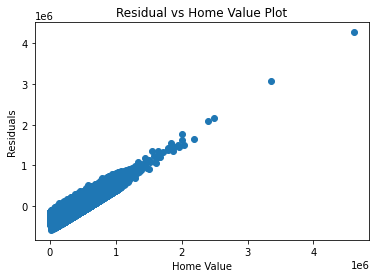

In [58]:
#make scatterplot of y-value vs residuals
plt.scatter(data=train, x='tax_value', y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [34]:
#calculate SSE
SSE_baseline =  MSE_baseline * len(df)
SSE = MSE * len(df)
print("SSE", SSE)


SSE 3.782541500316897e+16


In [59]:
#calculate ESS

ESS = ((train.yhat - train.tax_value.mean())**2).sum()
ESS


8690758997213477.0

In [60]:
#calculate TSS
# SSE_Baseline = TSS
# TSS = 4.65
#OR
TSS = ESS + SSE
TSS

4.651617400038245e+16

In [35]:
#calculate MSE
MSE_baseline = mean_squared_error(df.tax_value, df.baseline)
MSE = mean_squared_error(df.tax_value, df.predictions)
print("MSE:", MSE) 

MSE: 34496596892.804054


In [36]:
#calcuate RMSE
RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5
print("RMSE", RMSE) 

RMSE 185732.59512752213


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [62]:
#calculate baseline
train['baseline'] = train.tax_value.mean()


In [63]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat,residuals,baseline
511824,3,2.0,1845,497915,1952,5967.44,6037,363084.845412,134830.154588,334464.971072
986893,3,2.0,1524,320818,1955,4068.13,6037,312802.237467,8015.762533,334464.971072
1462975,2,2.0,1651,608536,1984,6639.32,6059,332695.979551,275840.020449,334464.971072
1152928,3,1.0,1112,372790,1953,4586.50,6037,248265.058423,124524.941577,334464.971072
816888,3,2.0,1424,340818,1975,4071.32,6059,297137.873621,43680.126379,334464.971072


In [17]:
# Calculate Mean Squared Error(MSE)
MSE_baseline = mean_squared_error(df.tax_value, df.baseline)
MSE = mean_squared_error(df.tax_value, df.predictions)


In [18]:
print("MSE baseline:", MSE_baseline) 
print("MSE:", MSE) 

MSE baseline: 42422527376.16448
MSE: 34496596892.804054


In [19]:
# Calculate SSE (Sum of Squared Errors)
SSE_baseline =  MSE_baseline * len(df)
SSE = MSE * len(df)

In [20]:
print("SSE baseline", SSE_baseline)
print("SSE", SSE)


SSE baseline 4.651617400038222e+16
SSE 3.782541500316897e+16


In [21]:
# Calculate root mean squared error
RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

In [22]:
print("RMSE baseline" ,RMSE_baseline)
print("RMSE", RMSE) 

RMSE baseline 205967.2968608475
RMSE 185732.59512752213


### 7. What is the amount of variance explained in your model?



In [23]:
# calculate root
# r2 score = expected variance


#import r2_score from sklearn
from sklearn.metrics import r2_score

In [24]:
df

,area,tax_value,baseline,predictions,baseline_residual,residual
511824,1845,497915,334464.971072,363084.845412,163450.028928,134830.154588
986893,1524,320818,334464.971072,312802.237467,-13646.971072,8015.762533
1462975,1651,608536,334464.971072,332695.979551,274071.028928,275840.020449
1152928,1112,372790,334464.971072,248265.058423,38325.028928,124524.941577
816888,1424,340818,334464.971072,297137.873621,6353.028928,43680.126379
...,...,...,...,...,...,...
1055694,1675,282434,334464.971072,336455.426874,-52030.971072,-54021.426874
488948,2146,412986,334464.971072,410234.580587,78521.028928,2751.419413
1828724,1775,456392,334464.971072,352119.790720,121927.028928,104272.209280
1189611,1440,353677,334464.971072,299644.171837,19212.028928,54032.828163


In [25]:
#My model
#use r2_score to calculate my model
r2_score(df.tax_value, df.predictions)

0.1868330571887069

In [26]:
#Baseline
#use r2 score to calculate baseline
r2_score(df.tax_value, df.baseline)


0.0

### 8. Is your model better than the baseline model?



In [27]:
# Yes
# My model has 0.18 while baseline has 0.0 

### 9. Create a file named evaluate.py that contains the following functions.

### . plot_residuals(y, yhat): creates a residual plot


In [73]:
def plot_residual(y, yhat):
    '''
    "creates a residual plot from y and yhat"
    '''
    # compute residuals
    residual = (yhat - y)
    sns.scatterplot(x=y, y=residual,color='blue', label='residual of regression')
    plt.axhline(y=0)
    plt.legend()
    plt.title("Residual scatter plot")
    plt.show()

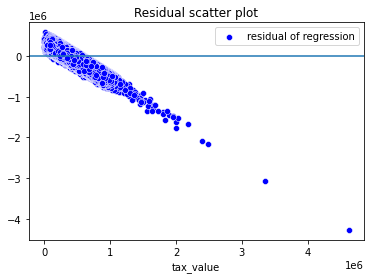

In [74]:
# plot 1
evaluate.plot_residual(df.tax_value, df.predictions)


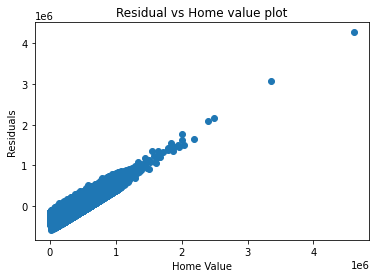

In [69]:
#plot 2
def plot_residuals(y, yhat):
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home value plot')
    plt.show()
    
plot_residuals(train.tax_value, train.yhat)


### . regression_errors(y, yhat): returns the following values:
#### sum of squared errors (SSE)
#### explained sum of squares (ESS)
#### total sum of squares (TSS)
#### mean squared error (MSE)
#### root mean squared error (RMSE)

In [70]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

regression_errors(train.tax_value, train.yhat)

(3.782541500316897e+16,
 8690758997213477.0,
 4.651617400038245e+16,
 34496596892.804054,
 185732.59512752213)

### . baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [71]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

baseline_mean_errors(train.tax_value)

(4.651617400038222e+16, 42422527376.16448, 205967.2968608475)

### . better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [72]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline. :( )')
        
better_than_baseline(train.tax_value, train.yhat)

My OSL model performs better than baseline
